# 课后作业：决策树(Decision Tree)与随机森林(Random Forests)

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

**【作业提交】**

将分类结果保存到文本文档进行提交(写上每一题的题号和题目，然后再贴答案)，同时提交源代码。
1. 测试结果命名为: ex06-结果-你的学号-你的姓名.txt
2. 输出图片命名为: ex06-性能对比图-你的学号-你的姓名.png (.jpg)
3. 源代码命名为: ex06-01-你的学号-你的姓名.py, ex06-02-你的学号-你的姓名.py, ex06-03-你的学号-你的姓名.py

<font color="red">*结果文件，要求每小题标注题号，两题之间要求空一行*</font>
___

要求在 “糖尿病预测” 数据集上分别使用决策树与随机森林完成以下任务，要求如下：
1. 要求训练集和测试集的分割比例为75%:25%
2. 使用**决策树**模型输出树的深度分别为3和5的得分，要求同时输出训练集和测试集上的评分结果。（ex06-01）
3. 使用**随机森林**模型输出森林中树的个数分别为4和6的得分，随机数种子=8，要求同时输出训练集和测试集上的评分结果。（ex06-02）
4. 同时使用**决策树**(树深度={1:20})和**随机森林**(树的棵树={1:20})进行建模，并输出性能对比图。（ex06-03, ex06-性能对比图）


- **决策树**

In [17]:
# 加载 pandas库，并使用read_csv()函数读取糖尿病预测数据集diabetes
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/diabetes.csv')

# 将数据中的特征和标签进行分离，其中第0位位索引号，第1-8位位特征，第9位为标签
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

# 以 70%:30%的比例对训练集和测试集进行拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dt3 = tree.DecisionTreeClassifier(max_depth = 3)
dt5 = tree.DecisionTreeClassifier(max_depth = 5)
dt3.fit(X_train, y_train)
dt5.fit(X_train, y_train)

print("max_depth=3, 训练集评分:{0:.3f}；测试集评分:{1:.3f}".format(dt3.score(X_train, y_train), dt3.score(X_test, y_test)))
print("max_depth=5, 训练集评分:{0:.3f}；测试集评分:{1:.3f}".format(dt5.score(X_train, y_train), dt5.score(X_test, y_test)))



max_depth=3, 训练集评分:0.766；测试集评分:0.750
max_depth=5, 训练集评分:0.816；测试集评分:0.724


- **随机森林**

In [4]:
# 加载 pandas库，并使用read_csv()函数读取糖尿病预测数据集diabetes
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('datasets/diabetes.csv')

# 将数据中的特征和标签进行分离，其中第0位位索引号，第1-8位位特征，第9位为标签
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

# 以 70%:30%的比例对训练集和测试集进行拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


rf3 = RandomForestClassifier(n_estimators = 3, random_state = 8, n_jobs = -1)
rf5 = RandomForestClassifier(n_estimators = 5, random_state = 8, n_jobs = -1)
rf3.fit(X_train, y_train)
rf5.fit(X_train, y_train)

print("n_estimators=3, 训练集评分:{0:.3f}；测试集评分:{1:.3f}".format(rf3.score(X_train, y_train), rf3.score(X_test, y_test)))
print("n_estimators=5, 训练集评分:{0:.3f}；测试集评分:{1:.3f}".format(rf5.score(X_train, y_train), rf5.score(X_test, y_test)))



n_estimators=3, 训练集评分:0.931；测试集评分:0.755
n_estimators=5, 训练集评分:0.964；测试集评分:0.724


- **性能对比**

 正在计算第40/40个模型，请稍等...计算完毕！


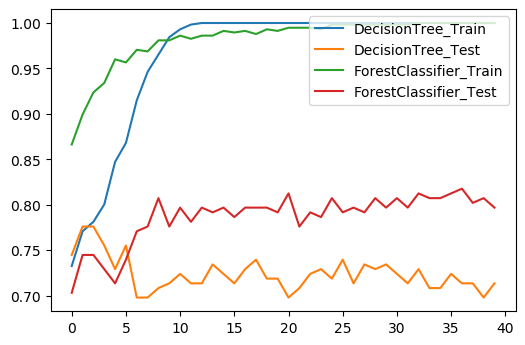

In [3]:
# 加载 pandas库，并使用read_csv()函数读取糖尿病预测数据集diabetes
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

data = pd.read_csv(os.path.join(os.getcwd(), '..', 'datasets', 'diabetes.csv'))

# 将数据中的特征和标签进行分离，其中第0位位索引号，第1-8位位特征，第9位为标签
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

# 以 70%:30%的比例对训练集和测试集进行拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

n = 40
scores = np.zeros([4, n]) #第1-4列分别为：score_train_dt,score_test_dt,score_train_rf,score_test_rf
num = np.arange(0, n)

for i in num:
    n = i + 1
    
    # 利用当行刷新方法显示正在计算的模型
    print("\r 正在计算第{}/{}个模型，请稍等...".format(n, num.shape[0]), end="")

    dt = tree.DecisionTreeClassifier(max_depth = n)
    dt.fit(X_train, y_train)
    
    rf = RandomForestClassifier(n_estimators = n, random_state = 8, n_jobs = -1)
    rf.fit(X_train, y_train)    
    
    scores[0, i] = dt.score(X_train, y_train)
    scores[1, i] = dt.score(X_test, y_test)
    scores[2, i] = rf.score(X_train, y_train)
    scores[3, i] = rf.score(X_test, y_test)
    
    if i == num.shape[0] - 1:
        print("计算完毕！")



plt.figure(dpi=100)
plt.plot(num, scores[0,:], label="DecisionTree_Train")
plt.plot(num, scores[1,:], label="DecisionTree_Test")
plt.plot(num, scores[2,:], label="ForestClassifier_Train")
plt.plot(num, scores[3,:], label="ForestClassifier_Test")

plt.legend(loc='upper right')
plt.savefig('results/Ch06Hw01DecisionTree.png', dpi=150)
plt.show()